In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()
from src.models.SVMClassifier import SVMClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Read data
data = pd.read_csv('../data/processed/train_processed.csv')
X_train, y_train = data.drop('class', axis=1), data['class']

clf = SVMClassifier()
clf.train(X_train, y_train)

df_test = pd.read_csv('../data/processed/test_processed.csv')
X_test, y_test = df_test.drop('class', axis=1), df_test['class']

print(clf.evaluate(X_test, y_test))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     23727
         QSO       0.97      0.90      0.93      7662
        STAR       0.95      1.00      0.97      8611

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



In [3]:
# Read data
data = pd.read_csv('../data/processed/train_reducted.csv')
X_train, y_train = data.drop('class', axis=1), data['class']

clf = SVMClassifier()
clf.train(X_train, y_train)

df_test = pd.read_csv('../data/processed/test_reducted.csv')
X_test, y_test = df_test.drop('class', axis=1), df_test['class']

print(clf.evaluate(X_test, y_test))

              precision    recall  f1-score   support

      GALAXY       0.93      0.95      0.94     23727
         QSO       0.97      0.84      0.90      7662
        STAR       0.88      0.93      0.91      8611

    accuracy                           0.92     40000
   macro avg       0.93      0.91      0.92     40000
weighted avg       0.93      0.92      0.92     40000



In [4]:
# Read data
data = pd.read_csv('../data/processed/train_undersampled.csv')
X_train, y_train = data.drop('class', axis=1), data['class']

clf = SVMClassifier()
clf.train(X_train, y_train)

df_test = pd.read_csv('../data/processed/test_reducted.csv')
X_test, y_test = df_test.drop('class', axis=1), df_test['class']

print(clf.evaluate(X_test, y_test))

              precision    recall  f1-score   support

      GALAXY       0.96      0.86      0.91     23727
         QSO       0.95      0.87      0.91      7662
        STAR       0.74      1.00      0.85      8611

    accuracy                           0.89     40000
   macro avg       0.88      0.91      0.89     40000
weighted avg       0.91      0.89      0.89     40000



In [5]:
# Read data
data = pd.read_csv('../data/processed/train_oversampled.csv')
X_train, y_train = data.drop('class', axis=1), data['class']

clf = SVMClassifier()
clf.train(X_train, y_train)

df_test = pd.read_csv('../data/processed/test_reducted.csv')
X_test, y_test = df_test.drop('class', axis=1), df_test['class']

print(clf.evaluate(X_test, y_test))

              precision    recall  f1-score   support

      GALAXY       0.96      0.91      0.94     23727
         QSO       0.93      0.89      0.91      7662
        STAR       0.84      1.00      0.91      8611

    accuracy                           0.92     40000
   macro avg       0.91      0.93      0.92     40000
weighted avg       0.93      0.92      0.93     40000



In [7]:
# Read data
data = pd.read_csv('../data/processed/train_processed.csv')
X_train, y_train = data.drop('class', axis=1), data['class']

clf = SVMClassifier()
clf.hyperparameter_tuning(X_train, y_train)
print(clf.best_params)
df_test = pd.read_csv('../data/processed/test_processed.csv')
X_test, y_test = df_test.drop('class', axis=1), df_test['class']

print(clf.evaluate(X_test, y_test))

Hyperparameter Tuning...
Best Score:  0.9721480286836549
{'C': 49.88720138545616, 'gamma': 0.18083692319941533, 'kernel': 'rbf'}
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     23727
         QSO       0.97      0.91      0.94      7662
        STAR       0.97      1.00      0.99      8611

    accuracy                           0.97     40000
   macro avg       0.97      0.96      0.97     40000
weighted avg       0.97      0.97      0.97     40000



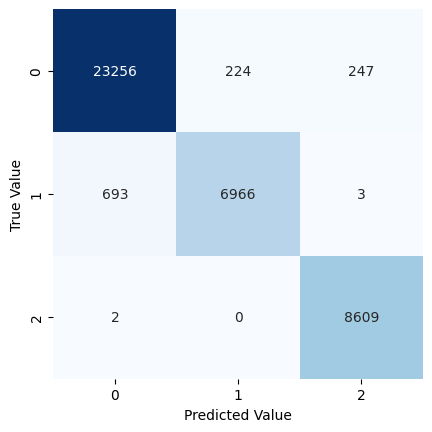

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
plt.figure()

ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('True Value')
plt.show()


In [26]:
# Display UMAP prediction and true values

import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(random_state=0)
embedding = reducer.fit_transform(X_test)


/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


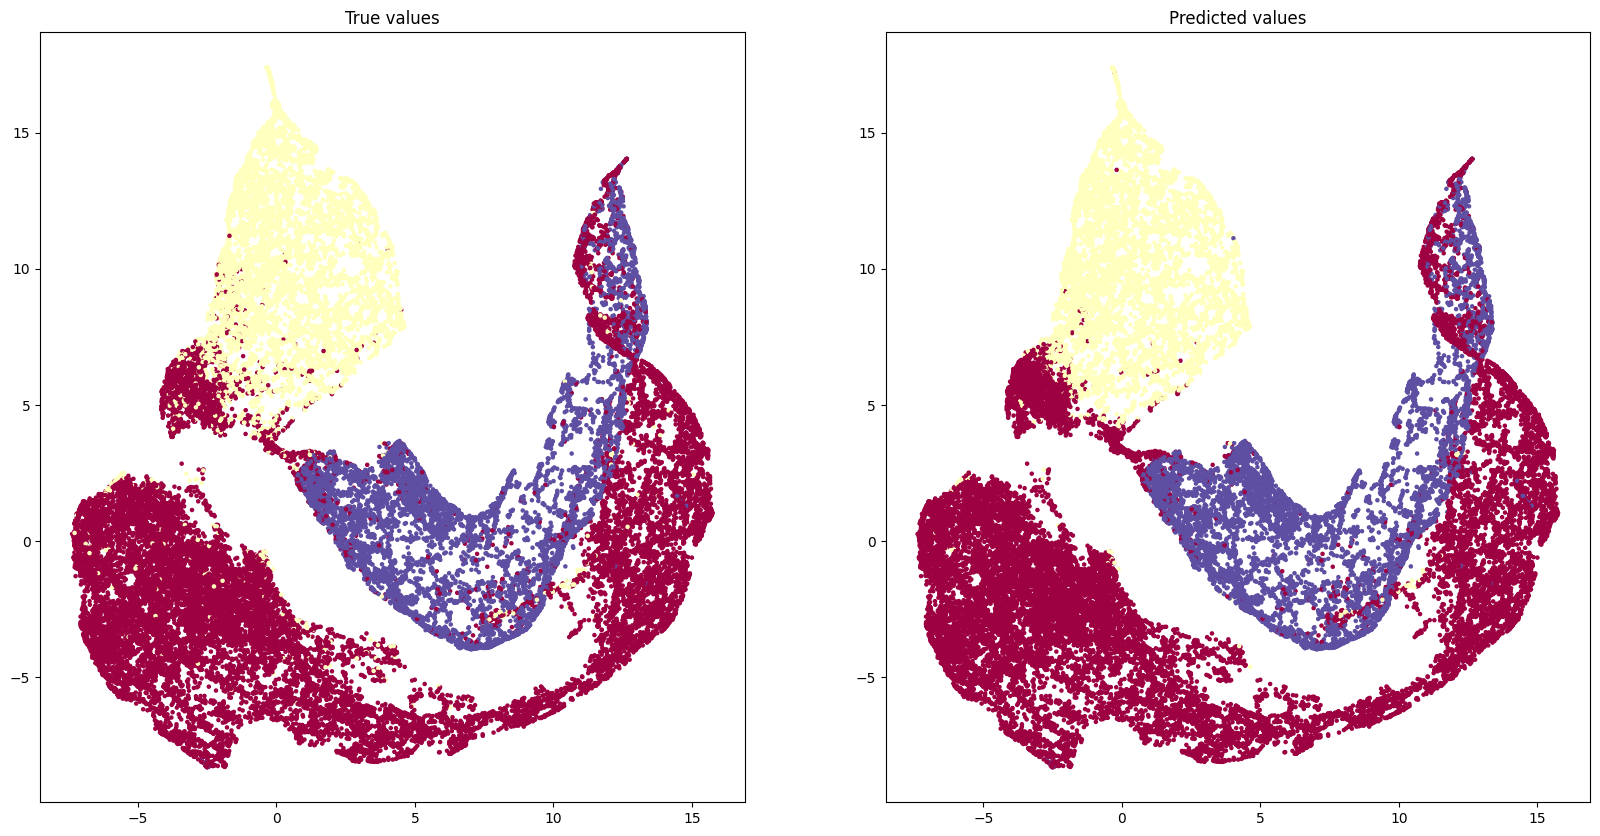

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

mapping = {"GALAXY": 0, "QSO": 1, "STAR": 2}

ax[0].scatter(embedding[:, 0], embedding[:, 1], c=[mapping[x] for x in y_test], cmap='Spectral', s=5)
ax[0].set_title('True values')
ax[1].scatter(embedding[:, 0], embedding[:, 1], c=[mapping[x] for x in y_pred], cmap='Spectral', s=5)
ax[1].set_title('Predicted values')
plt.show()

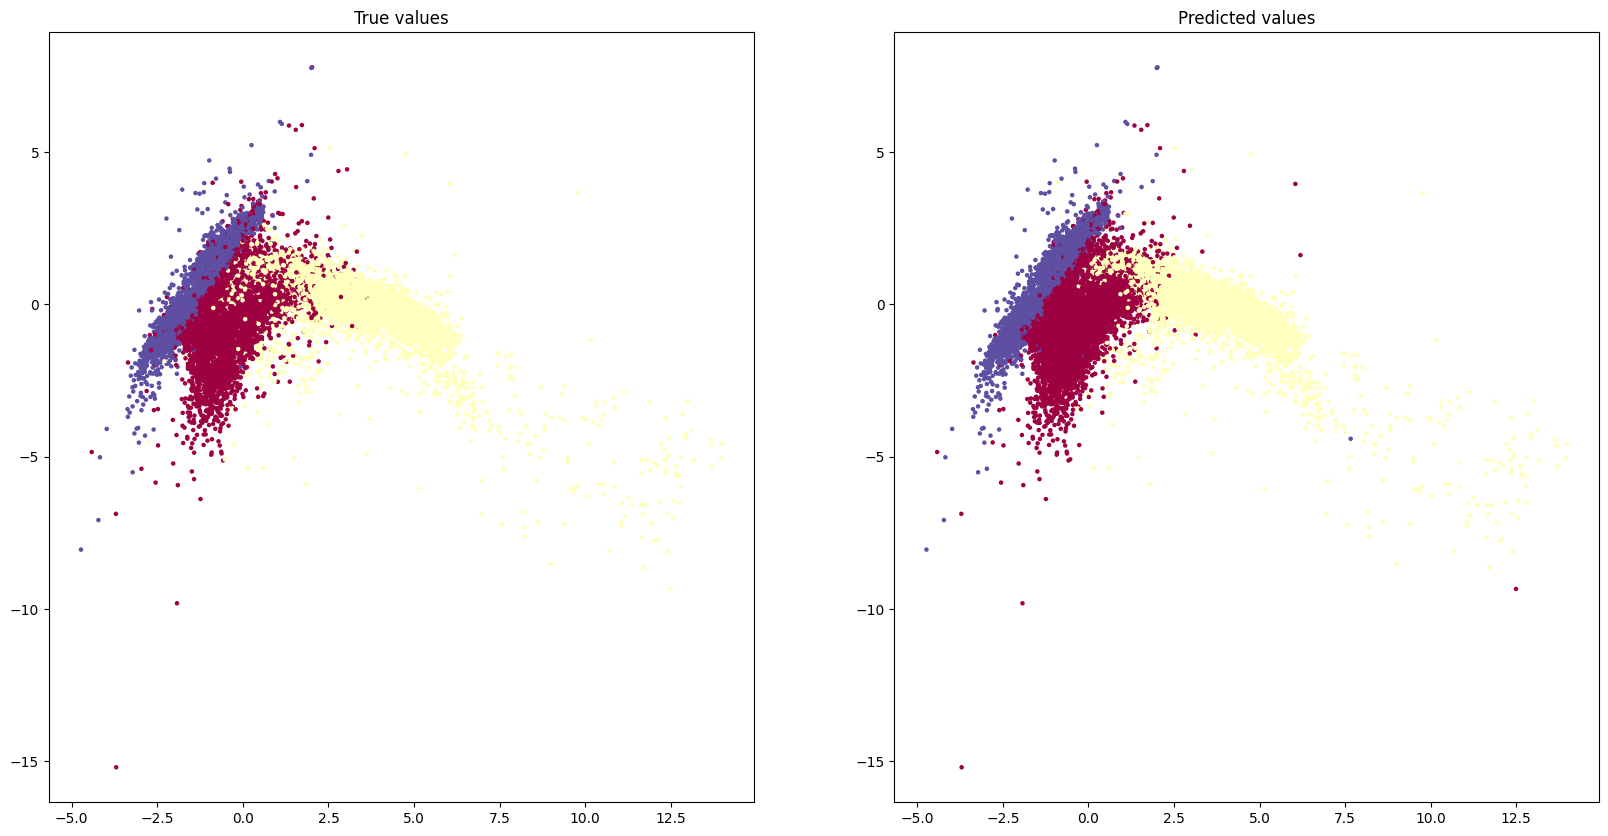

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
embedding = lda.fit_transform(X_test, y_test)

fig, ax = plt.subplots(1,2, figsize=(20,10))

mapping = {"GALAXY": 0, "QSO": 1, "STAR": 2}

ax[0].scatter(embedding[:, 0], embedding[:, 1], c=[mapping[x] for x in y_test], cmap='Spectral', s=5)
ax[0].set_title('True values')
ax[1].scatter(embedding[:, 0], embedding[:, 1], c=[mapping[x] for x in y_pred], cmap='Spectral', s=5)
ax[1].set_title('Predicted values')
plt.show()

